In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('loan_approval_dataset.json')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [26]:
df.shape

(252000, 13)

In [5]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


In [8]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [10]:
X = df.drop(columns=['Id', 'Risk_Flag'])  # Drop the Id and target column from features
y = df['Risk_Flag']  # Target variable

In [11]:
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

In [12]:
# 2.4 Create a column transformer with appropriate preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Income', 'Age',
                                                   'Experience',
                                                   'CURRENT_JOB_YRS',
                                                   'CURRENT_HOUSE_YRS']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Married/Single',
                                                   'House_Ownership',
                                                   'Car_Ownership',
                                                   'Profession', 'CITY',
                                                   'STATE'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [18]:
y_pred = pipeline.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8985714285714286
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



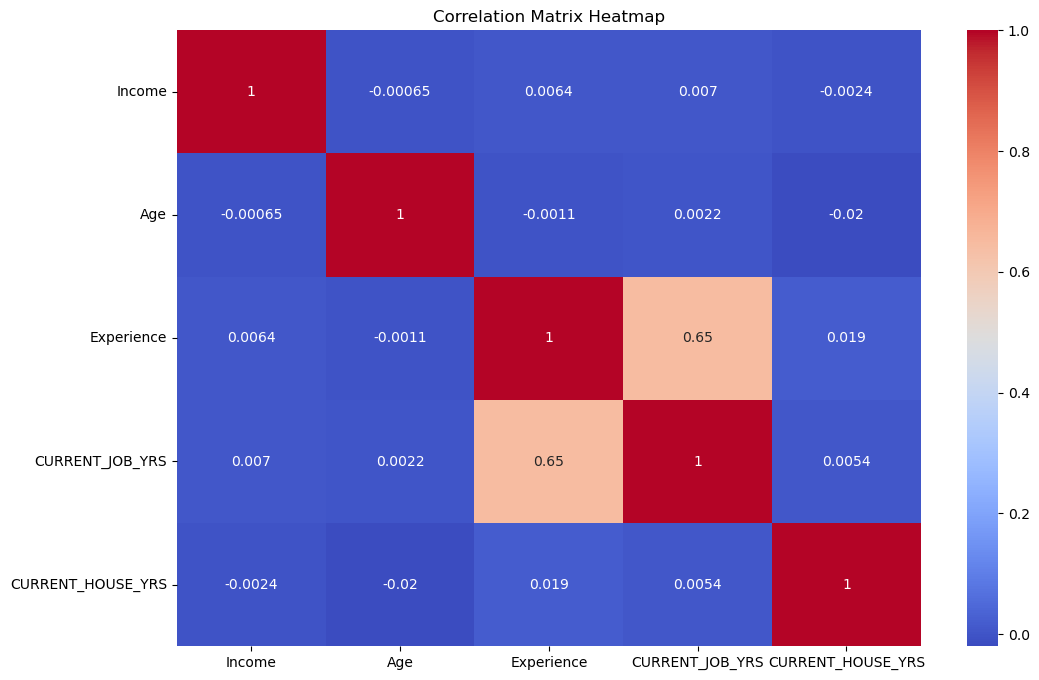

In [23]:
# Select only numerical columns for correlation matrix
numerical_df = df[['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']]

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

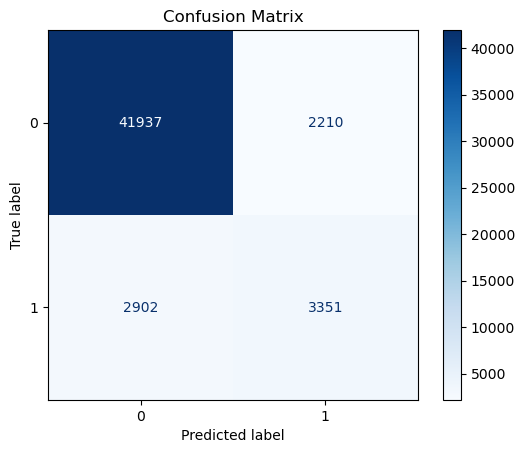

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Results
The model achieved an accuracy of 89.86% on the test set. The precision, recall, and F1-score for both classes are detailed in the notebook.